<p style="background-color:#f0efeb;font-family:robotto;color:#003566;font-size:150%;text-align:center;border-radius:6px 6px;">Personal Bank Loan</p>

<p style="background-color:#f0efeb;font-family:robotto;color:#003566;font-size:150%;text-align:center;border-radius:6px 6px;">Import Library</p>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set(rc={'axes.facecolor': '#e9ecef', 'figure.facecolor': '#e9ecef'})
palette = ["#003566", "#023e8a", "#0077b6", "#02c39a"]
royalblue = colors.LinearSegmentedColormap.from_list('royalblue', [(0, (1,1,1)), (1, (0.25,0.41,0.88))])
royalblue_r = royalblue.reversed()

<p style="background-color:#f0efeb;font-family:robotto;color:#003566;font-size:150%;text-align:center;border-radius:6px 6px;">Import Dataset</p>

In [ ]:
df = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx', sheet_name = 'Data')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


<p style="background-color:#f0efeb;font-family:robotto;color:#003566;font-size:150%;text-align:center;border-radius:6px 6px;">About The Dataset</p>

<br />

    
|Variables|Explanation|
|-------|-------|
|ID|ID of the customer|
|Age|Age of the customer in completed years|
|Experience|Amount of work experience in years|
|Income|Amount of annual income in thousands|
|Zipcode|Postal codein which the client lives|
|Family|Number of family members|
|CCAvg|Average monthly spending with the credit card in thousands|
|Education|Education level: <br />1: bachelor's degree <br />2: master's degree <br/>3: advanced/professional degree|
|Mortgage|Value of home mortgage|
|Securities Account|Status of securities account ownership: <br />0: no <br />1: yes|
|CD Account|Status of certificate of deposit account ownership: <br />0: no <br />1: yes|
|Online|Does the customer use the internet banking facilities:  <br />0: no <br />1: yes|
|CreditCard|Credit card ownership status:  <br />0: no <br />1: yes|
|Personal Loan|Customer accept the personal loan campaign in the last year:  <br />0: no <br />1: yes|

<p style="background-color:#f0efeb;font-family:robotto;color:#003566;font-size:150%;text-align:center;border-radius:6px 6px;">Exploratory Data Analysis</p>

In [ ]:
df.shape

(5000, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


**Conclusions:**

* The dataset consist of 5000 data points
* The dataset contains 14 variables consisting of 13 independent variables and 1 dependent variable
* All columns are numerical data type. From the dataset explanation we know that some columns are categorical, we will convert it later if needed
* The dataset doesnt seem to have any missing values

**Drop the ID columns**
<br />
ID acts as an identifier and lacks valuable information for the model

In [ ]:
df = df.drop(columns = ['ID'], axis = 1)

**Separating the categorical variable**

In [ ]:
to_convert_categorical = ['Family', 'Education', 'CD Account', 'CreditCard', 'Online', 'Securities Account', 'Personal Loan']

df[to_convert_categorical] = df[to_convert_categorical].astype('object')

**Statistical summary for numerical variable**

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.7,1.5,2.5,10.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0


**Conclusions:**

* Age: The average of the customer's age is 45, with the youngest is 23 and the oldest is 67
* Experience: The average experience of customer is 20 years. The column contains negative value, which we can considered to be an error value, we will handle it later
* Income: The mean annual income is 73, with the lowest is 8 and the highest income is 224
* ZIP Code: This variable contains a large number of categories. Therefore, it seems lack much information for our model.
* CCAvg: The mean of average spending on credit cards per month is 1.93, with the lowest being 0 and the highest is 10
* Mortgage: The mean of value of house mortgage is 56

**Statistical summary for categorical variable**

In [ ]:
df.describe(include = 'object')

,Family,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000,5000,5000,5000,5000,5000,5000
unique,4,3,2,2,2,2,2
top,1,1,0,0,0,1,0
freq,1472,2096,4520,4478,4698,2984,3530


**Conclusions:**

* Family: Customer with only 1 family member is occuring the most, 1472 times out of 5000
* Education: Most of the customer have a degree in bachelor
* Personal Loan: We can see that most of the customer doesnt take the personal loan campaign last year
* Securities Account: Most of the customer doesnt have securities account with the bank
* CD Account: Majority of the customer doesnt have CD Account with the bank
* Online: Most of the customer use online bank facilities that the bank provides
* CreditCard: 0 is the most occuring in the CreditCard column, meaning that majority of customer doesnt have credit card

**Separating the numerical variables**

In [ ]:
continuous_features = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']
df_continuous = df[continuous_features]

<p style="background-color:#f0efeb;font-family:robotto;color:#003566;font-size:150%;text-align:center;border-radius:6px 6px;">Univariate Data Analysis</p>

<br />

We will focus on each feature to understand the distribution and the range.
<br /> <br />
For continuous variables, we employ histograms to gain insight into the distribution of each feature. For categorical variables, we will use barplot to visualize the frequency of each category

**Numerical variable univariate data analysis**

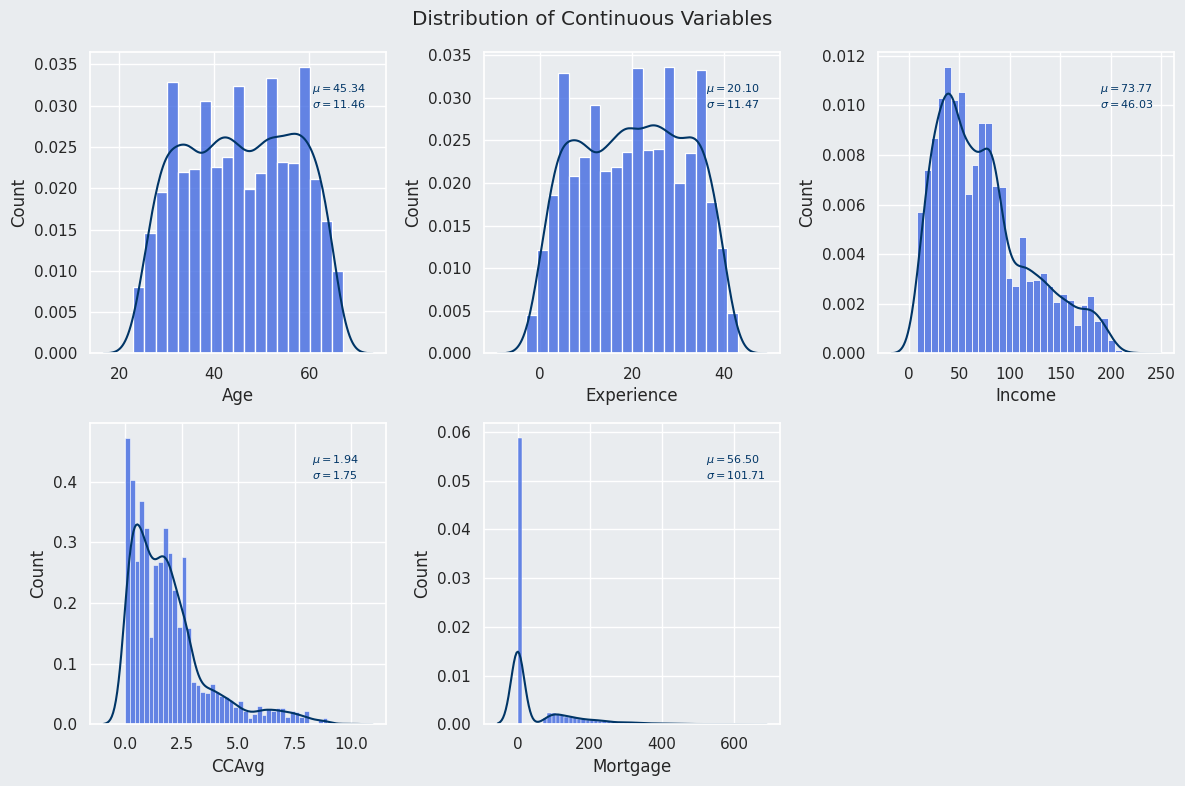

In [ ]:
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (12, 8))

for i, col in enumerate(df_continuous.columns):
    x = i // 3
    y = i % 3

    sns.histplot(data = df_continuous, x = col, color = 'royalblue', alpha = 0.8, stat = 'density', ax = ax[x, y])
    sns.kdeplot(data = df_continuous, x = col, color = palette[0], ax = ax[x, y])

    ax[x, y].set_xlabel(col)
    ax[x, y].set_ylabel('Count')

    text = '\n'.join((r'$\mu=%.2f$' % df_continuous[col].mean(),
                     r'$\sigma=%.2f$' % df_continuous[col].std()))

    ax[x, y].text(0.75, 0.9, text, transform = ax[x, y].transAxes, fontsize = 8, verticalalignment = 'top', color = palette[0])

ax[1, 2].axis('off')
plt.suptitle('Distribution of Continuous Variables')
plt.tight_layout()
plt.show()

**Conclusions:**

* Age: Somehow the distribution of age variable is uniform. The average age of the customer is 45 with the standard deviation of 11.46
* Experience: The experience variable have a uniform distribution same as the age variable, as experience and age is correlated
* Income: The income variable is positively skewed, with average income of customer annualy is 73 and the standard deviation is 46.03. The customer annualy income is concentrate around 35 - 60
* CCAvg: The CCAvg variable is also positively skewed. With the mean of 1.94 and standard deviation of 1.75

In [ ]:
categorical = ['CD Account', 'Education', 'Family', 'Securities Account', 'Online', 'CreditCard', 'Personal Loan']

**Categorical variable univariate data analysis**

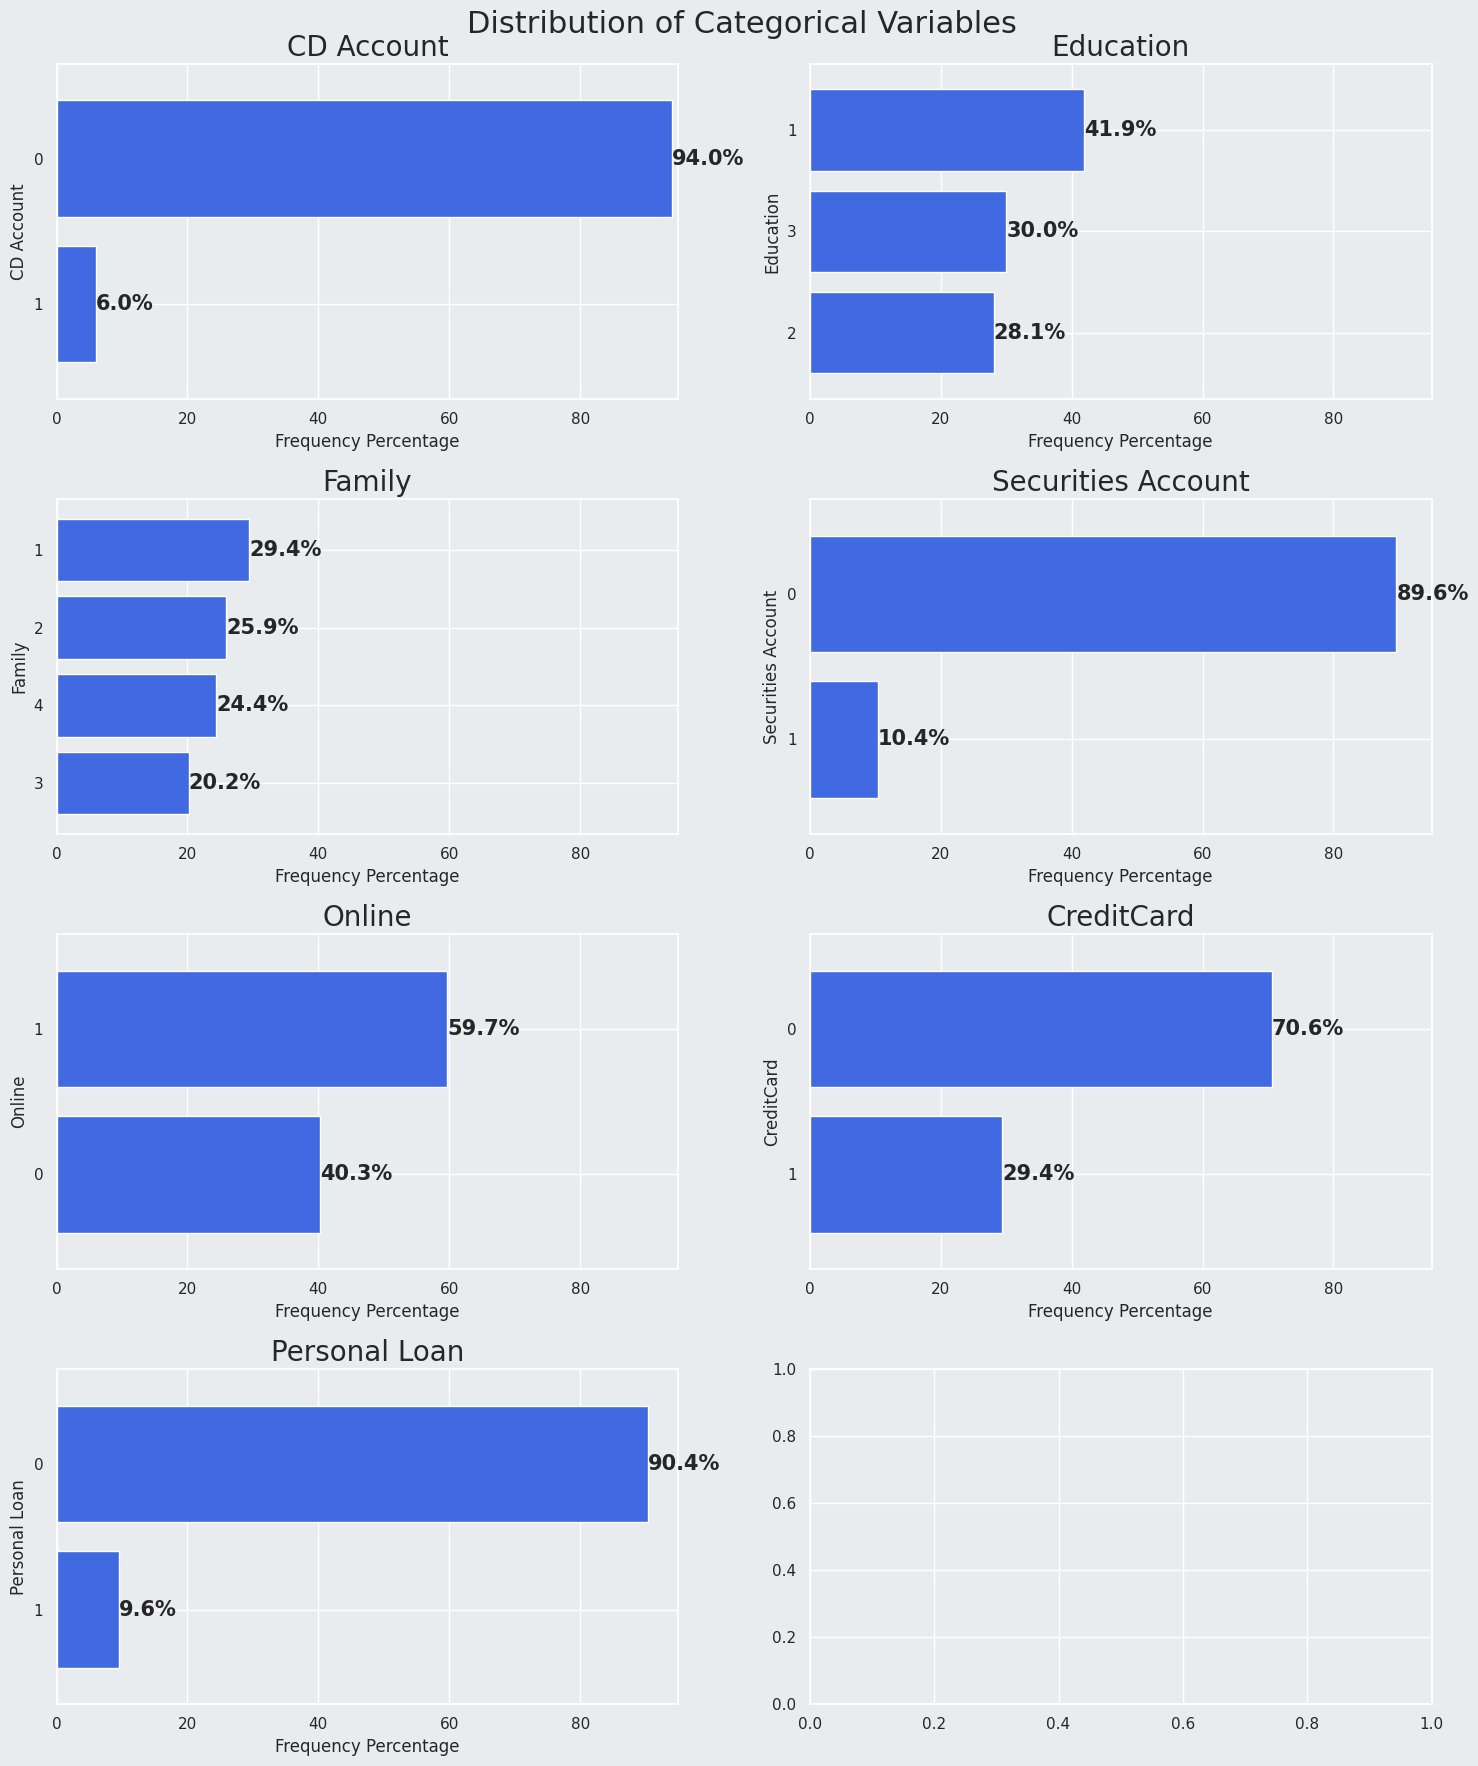

In [ ]:
fig, ax = plt.subplots(4, 2, figsize = (15, 18))

for i, col in enumerate(categorical):
    x = i // 2
    y = i % 2

    value_counts = df[col].value_counts(normalize = True).mul(100).round(1).sort_values()

    value_counts.plot(kind = 'barh', ax = ax[x, y], width = 0.8, color = 'royalblue')

    for j, val in enumerate(value_counts):
        ax[x, y].text(val, j, str(val) + '%', fontsize = 15,
                     weight = 'bold', va = 'center')

    ax[x, y].set_xlim([0, 95])
    ax[x, y].set_xlabel('Frequency Percentage', fontsize = 12)
    ax[x, y].set_title(f'{col}', fontsize = 20)

plt.suptitle('Distribution of Categorical Variables', fontsize = 22)
plt.tight_layout()
plt.subplots_adjust(top = 0.95)
plt.show()

**Conclusions:**

* CD Account: The number of customer that doesnt have a certificate of deposit account with the bank is a lot higher than the customer who does, showing significant majority
* Education: Almost half of the customer have education in bachelor's degree
* Family: Majority of the customer is having only 1 person in the family.
* Securities Account: Almost 90% of the customer doesnt have securities account with the bank
* Online: 59.7% of the customer use internet banking facilities that is provide by the bank. Majority of the society needs online banking as time goes by
* CreditCard: Most of the customer doesnt have credit card issued by the bank
* Personal Loan: About 90.4% of the customer doesnt accept the personal loan offered in the last campaign. The dataset is imbalanced!

<p style="background-color:#f0efeb;font-family:robotto;color:#003566;font-size:150%;text-align:center;border-radius:6px 6px;">Correlation Analysis</p>

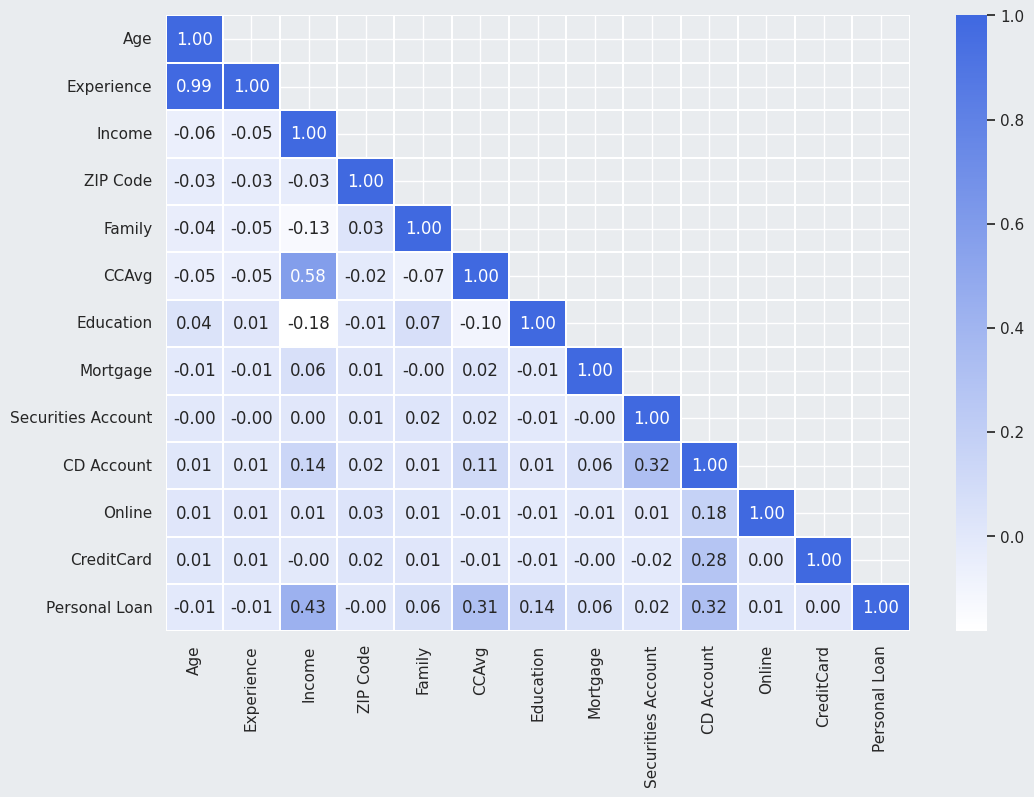

In [ ]:
df_ordered = pd.concat([df.drop(columns = ['Personal Loan'], axis = 1), df['Personal Loan']], axis = 1)
corr = df_ordered.corr(method = 'spearman')

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True

plt.figure(figsize = (12, 8))
sns.heatmap(corr, mask = mask, annot = True, cmap = royalblue, fmt = '.2f', linewidths = 0.2)
plt.show()

**Conclusions:**

* Personal Loan is highly correlated with Income, CCAvg and CD Account
* As i said earlier, Age is highly correlated with Experience (p = 0.99)
* CCAvg is highly correlated with Income

<p style="background-color:#f0efeb;font-family:robotto;color:#003566;font-size:150%;text-align:center;border-radius:6px 6px;">Noise Treatment</p>

In the statistical summary we can see that the ZIP Code minimum value is 9307, and we know that ZIP Code in USA contains 5 digits, which indicating that there is noise in this variable. Lets check it

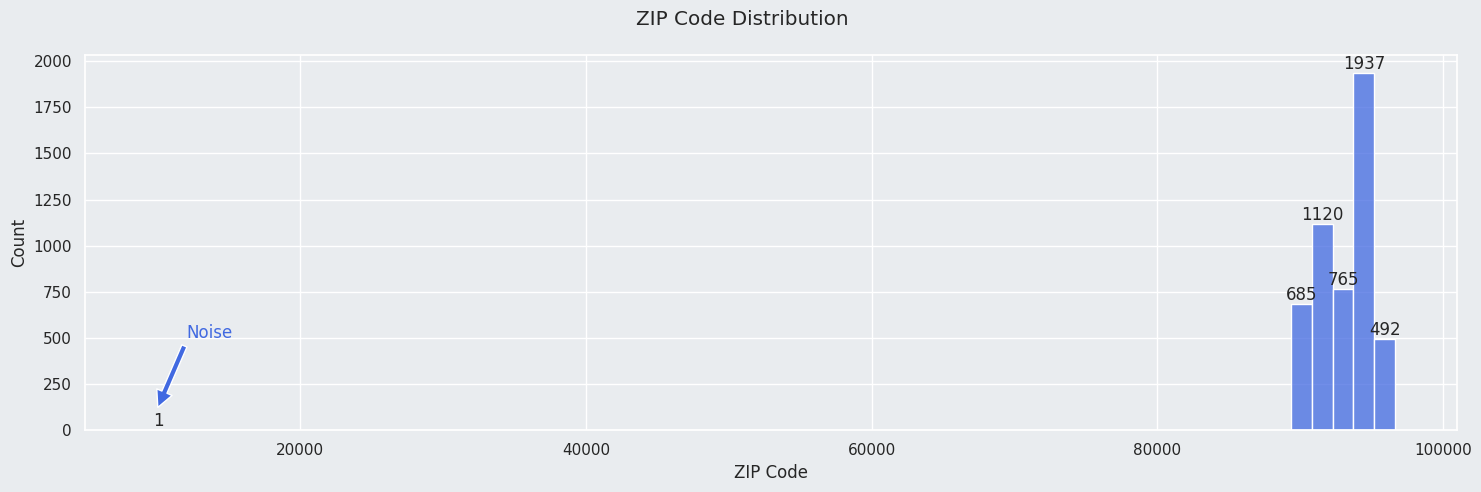

In [ ]:
plt.figure(figsize = (15, 5))

graph = sns.histplot(data = df, x = 'ZIP Code', bins = 60, color = 'royalblue')

labels = [str(v) if v else '' for v in graph.containers[0].datavalues]
graph.bar_label(graph.containers[0], labels = labels)

plt.annotate('Noise', xy = (10000, 120), xytext = (12000, 500), color = 'royalblue',
             arrowprops = dict(facecolor = 'royalblue', shrink = 0.01))

plt.xlabel('ZIP Code')
plt.ylabel('Count')
plt.suptitle('ZIP Code Distribution')
plt.tight_layout()
plt.show()

In [ ]:
df[df['ZIP Code'] < 20000]

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
384,51,25,21,9307,4,0.6,3,0,0,0,0,1,1


We found 1 noisy data in ZIP Code

In [ ]:
df.drop(df[df['ZIP Code'] < 20000].index, inplace = True)
df.reset_index(drop = True, inplace = True)

As we see in the statistical summary section, the Experience variable has a negative value, which is considered noise

In [ ]:
total_neg = df[df['Experience'] < 0]['Experience'].count()

print(df[df['Experience'] < 0]['Experience'].value_counts())
print('Total Noise in Experience: ', total_neg)

Experience
-1    33
-2    15
-3     4
Name: count, dtype: int64
Total Noise in Experience:  52


There are 52 negative values in total. Since the number of noise is small, we can assume that these values are incorrectly recorded as negative and we can replace them with their absolute value

In [ ]:
df['Experience'] = df['Experience'].apply(abs)

<p style="background-color:#f0efeb;font-family:robotto;color:#003566;font-size:150%;text-align:center;border-radius:6px 6px;">Removing Outlier</p>

If tried to use IQR method to detecting and removing outliers, but IQR method resulting on poor model performance, increasing aroung 4% - 5%. For that we can detect and removing outliers with the Z-Score method

In [ ]:
from scipy import stats

for i, var in enumerate(continuous_features):
  outlier_indexes = df[stats.zscore(df[var]) > 3].index
  df.drop(outlier_indexes, inplace = True)

df.reset_index(drop = True, inplace = True)

In [ ]:
df.shape

(4777, 13)

We found 223 records with a Z-Score value greater than 3, We consider these records are outliers and filter out these records from our dataset

<p style="background-color:#f0efeb;font-family:robotto;color:#003566;font-size:150%;text-align:center;border-radius:6px 6px;">Missing Values Treatment</p>

In [ ]:
df.isnull().sum()

,0
Age,0
Experience,0
Income,0
ZIP Code,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal Loan,0
Securities Account,0


We can see that there are no missing value in the dataset

<p style="background-color:#f0efeb;font-family:robotto;color:#003566;font-size:150%;text-align:center;border-radius:6px 6px;">Duplicate Values Treatment</p>

In [ ]:
df[df.duplicated(keep = False)].sum().sum()

0.0

Its clear that there are no duplicate value in the dataset

In the variable explanation, we know that CCAvg represents average monthly credit card spending, but Income represents the amount of annual income. To make the units of features equal, we convert average monthly credit card spending to annualy

In [ ]:
df['CCAvg'] = df['CCAvg'] * 12

Remove the target from categorical array

In [ ]:
categorical.remove('Personal Loan')

<p style="background-color:#f0efeb;font-family:robotto;color:#003566;font-size:150%;text-align:center;border-radius:6px 6px;">Bivariate Data Analysis</p>

We are going to gain a deeper understanding of the relationship between individual features and target, revealing potential predictors for persoal loan

<p style="background-color:#f0efeb;font-family:robotto;color:#003566;font-size:150%;text-align:center;border-radius:6px 6px;">Categorical Variables vs Target</p>

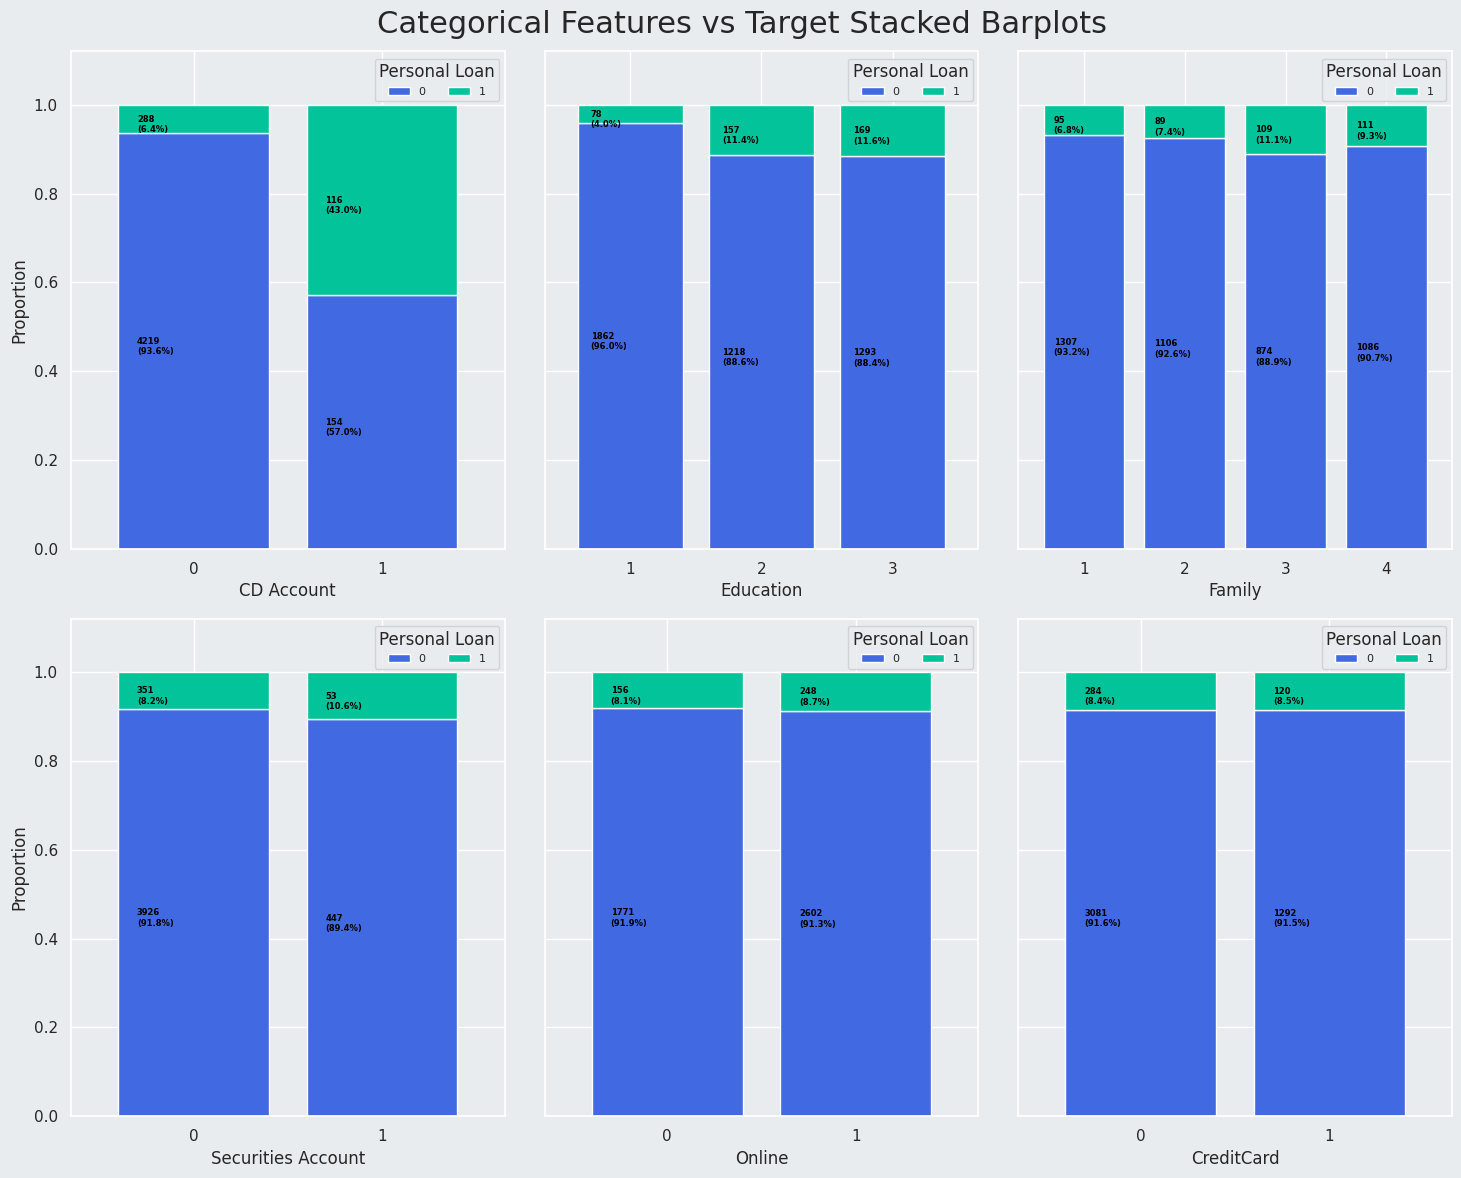

In [ ]:
from matplotlib.colors import ListedColormap

fig, ax = plt.subplots(2, 3, figsize = (15, 12))

for i, col in enumerate(categorical):
    cross_tab = pd.crosstab(index = df[col], columns = df['Personal Loan'])
    cross_tab_prop = pd.crosstab(index = df[col], columns = df['Personal Loan'], normalize = 'index')

    x, y = i // 3, i % 3

    cmap = ListedColormap(['royalblue', palette[3]])

    cross_tab_prop.plot(kind = 'bar', ax = ax[x, y], stacked = True, width = 0.8, colormap = cmap,
                       legend = False, ylabel = 'Proportion', sharey = True)

    for j, val in enumerate([*cross_tab.index.values]):
        for (proportion, count, y_location) in zip(cross_tab_prop.loc[val], cross_tab.loc[val],
                                                  cross_tab_prop.loc[val].cumsum()):
            ax[x, y].text(x = j - 0.3, y = (y_location - proportion) + (proportion / 2) - 0.03,
                         s = f'{count}\n({np.round(proportion * 100, 1)}%)', color = 'black',
                         fontsize = 6, fontweight = 'bold')

    ax[x, y].legend(title = 'Personal Loan', loc = (0.7, 0.9), fontsize = 8, ncol = 2)
    ax[x, y].set_ylim([0, 1.12])
    ax[x, y].set_xticklabels(ax[x, y].get_xticklabels(), rotation = 0)

plt.suptitle('Categorical Features vs Target Stacked Barplots', fontsize = 22)
plt.tight_layout()
plt.show()

**Conclusions:**

* CD Account: Customers who has certificate with the bank appears to take personal loan from the bank
* Customers with higher levels of education are more likely to take personal loan from the bank
* The number of family members has minimum effect on the probability on taking personal loan
* Securities Account seems to have no influence on a customer taking personal loan
* The use of internet banking does not seems to have any influence on taking personal loan
* The customer who uses or does not use a credit card does not appear to have an impact on the likelihood of purchasing a personal loan.

<p style="background-color:#f0efeb;font-family:robotto;color:#003566;font-size:150%;text-align:center;border-radius:6px 6px;">Numerical Variables vs Target</p>

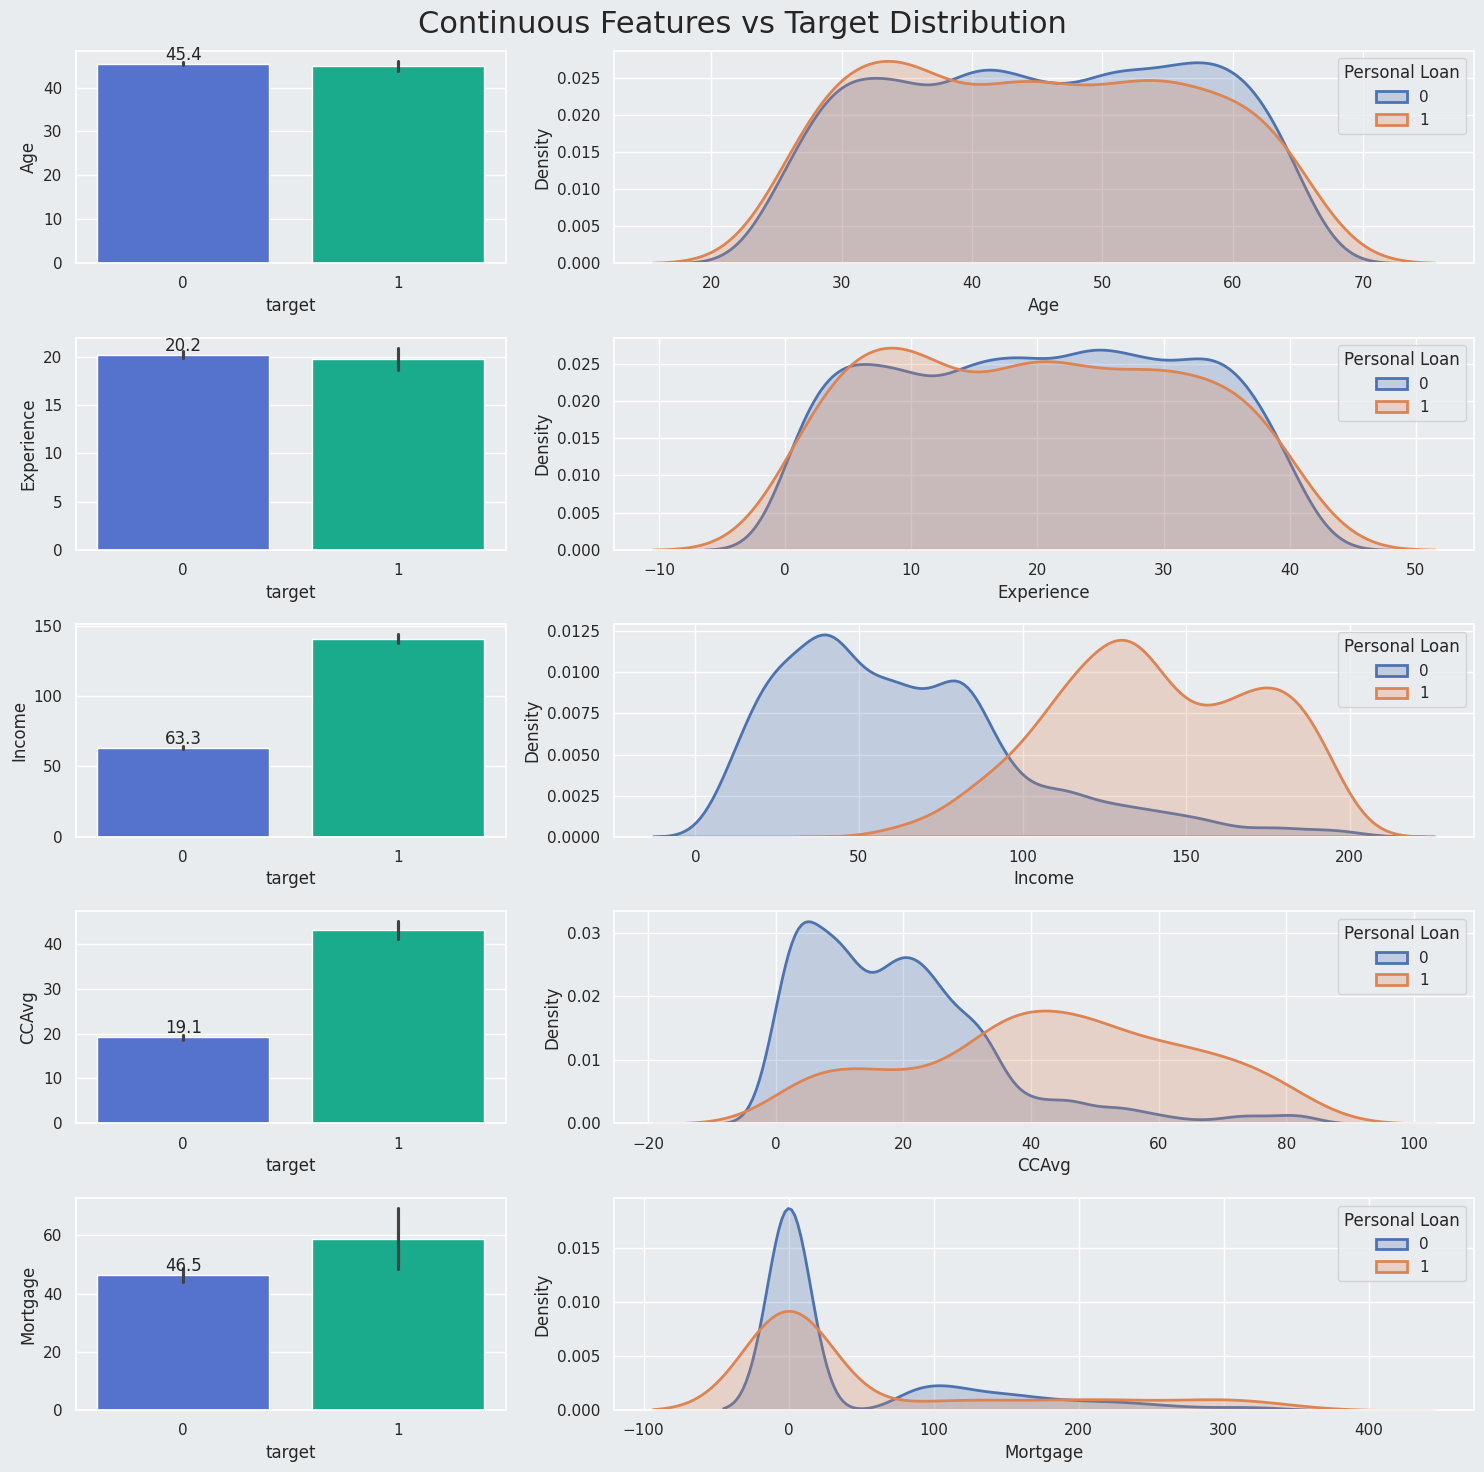

In [ ]:
fig, ax = plt.subplots(len(continuous_features), 2, figsize = (15, 15),
                       gridspec_kw = {'width_ratios': [1, 2]})

for i, col in enumerate(continuous_features):
    sns.barplot(x = df['Personal Loan'], y = df[col], ax = ax[i, 0], palette = ['royalblue', palette[3]])

    ax[i, 0].set_xlabel('target')
    ax[i, 0].set_ylabel(col)
    ax[i, 0].bar_label(ax[i,0].containers[0], fmt = '%.3g')

    sns.kdeplot(data = df[df['Personal Loan'] == 0], x = col, fill = True, palette = ['royalblue', palette[3]], linewidth = 2, ax = ax[i, 1], label = '0')
    sns.kdeplot(data = df[df['Personal Loan'] == 1], x = col, fill = True, palette = ['royalblue', palette[3]], linewidth = 2, ax = ax[i, 1], label = '1')

    ax[i, 1].legend(title = 'Personal Loan', loc = 'upper right')

plt.suptitle('Continuous Features vs Target Distribution', fontsize = 22)
plt.tight_layout()
plt.show()

**Conclusions:**

* Age: We can see that age of customers has no influence on the probability of a customer taking personal loan
* Experience: The effect of the amount of work experience on the probability of a customer taking personal loan is similiar to the age of customer. We can see that the distribution is very similiar too, as experience is strongly correlated with age. Therefore, we will remove experience because it doesnt provide any more information than age
* Income: Customers with higher income are more likely to take personal loan
* CCAvg: Customer who spend more on their credit are more likely to take out personal loan
* Mortgage: Customers with high mortgage value are more likely to take personal loan

**Drop The Experience Column**

In [ ]:
df.drop('Experience', axis = 1, inplace = True)

<p style="background-color:#f0efeb;font-family:robotto;color:#003566;font-size:150%;text-align:center;border-radius:6px 6px;">Data Preprocessing</p>

**Separates Feature and Target Variables**

In [ ]:
X = df.drop('Personal Loan', axis = 1)
y = df['Personal Loan']

We know that the dataset is imbalanced. When we dealing with imbalanced dataset, we will use stratification in the train test split to ensures that the proportion of each class remains the same accross both the training and the test set

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

**Proportion of Each Class Among Training and Test Set**

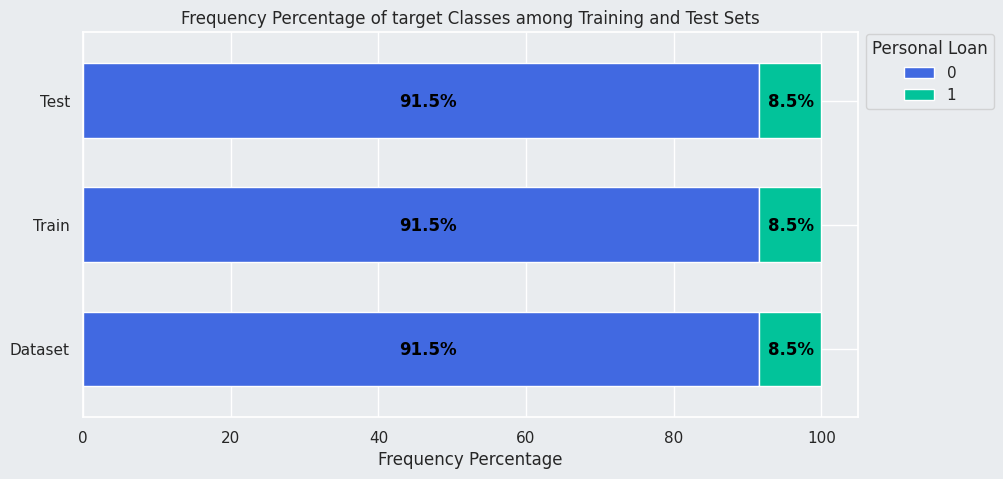

In [ ]:
df_perc = pd.concat([y.value_counts(normalize = True).mul(100).round(1),
                     y_train.value_counts(normalize = True).mul(100).round(1),
                     y_test.value_counts(normalize = True).mul(100).round(1)], axis = 1)

df_perc.columns = ['Dataset', 'Train', 'Test']
df_perc = df_perc.T

df_perc.plot(kind = 'barh', stacked = True, figsize = (10, 5), width = 0.6, colormap = ListedColormap(['royalblue', palette[3]]))

for i, val in enumerate([*df_perc.index.values]):
  for (percentage, y_location) in zip(df_perc.loc[val], df_perc.loc[val].cumsum()):
    plt.text(x = (y_location - percentage) + (percentage / 2) - 3, y = i - 0.05,
             s = f'{percentage}%', color = 'black', fontsize = 12, fontweight = 'bold')

plt.legend(title = 'Personal Loan', loc = (1.01, 0.8))
plt.xlabel('Frequency Percentage')
plt.title('Frequency Percentage of target Classes among Training and Test Sets')
plt.show()

**Define the f1_metric function**

<br />

This function return the f1 score for the positive class (1)

In [ ]:
from sklearn.metrics import f1_score

def f1_metric(model, X_train, y_train):
  return f1_score(y_train, model.predict(X_train), average = 'binary')

**Define the drop_column_importance function**

In [ ]:
from sklearn.base import clone
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV

def drop_column_importance(model, X_train, y_train, random_state = 0):
  importances = []

  model_clone = clone(model)
  model_clone.random_state = random_state
  model_clone.fit(X_train, y_train)

  cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 0)
  benchmark_score = cross_val_score(model_clone, X_train, y_train, cv = cv, scoring = f1_metric).mean()

  for col in X_train.columns:
    model_clone = clone(model)
    model_clone.random_state = random_state
    model_clone.fit(X_train.drop(col, axis = 1), y_train)

    drop_column_score = cross_val_score(model_clone, X_train.drop(col, axis = 1), y_train,
                                        cv = cv, scoring = f1_metric).mean()

    importances.append(benchmark_score - drop_column_score)

  importances_df = pd.DataFrame({
      'feature': X_train.columns,
      'feature importance': importances}).sort_values('feature importance', ascending = False).reset_index(drop = True)

  return importances_df

**Define drop_column_importance_plot to plot the result of drop column feature importance**

In [ ]:
def drop_column_importance_plot(model, X_train, y_train):
  df_drop_column = drop_column_importance(model, X_train, y_train, random_state = 0)

  df_drop_column.columns = ['Feature', 'Feature Importance']

  plt.figure(figsize = (12, 10))
  sns.barplot(data = df_drop_column, x = 'Feature Importance', y = 'Feature',
              orient = 'h', color = 'royalblue')

  plt.title('Drop Column Feature Importance')
  plt.show()

**Deifne metrics_calculator and model_evaluation, both function is use to evaluate the performance of a model**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

def metrics_calculator(clf, X_test, y_test, model_name):
    y_pred = clf.predict(X_test)
    result = pd.DataFrame(data=[accuracy_score(y_test, y_pred),
                                precision_score(y_test, y_pred, average='binary'),
                                recall_score(y_test, y_pred, average='binary'),
                                f1_score(y_test, y_pred, average='binary'),
                                roc_auc_score(y_test, clf.predict_proba(X_test)[::,1])],
                          index=['Accuracy','Precision','Recall','F1-score','AUC'],
                          columns = [model_name])

    result = (result * 100).round(2).astype(str) + '%'
    return result

In [ ]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, RocCurveDisplay

def model_evaluation(clf, X_train, X_test, y_train, y_test, model_name):
    sns.set(font_scale=1.2)

    y_pred_train = clf.predict(X_train)
    print("\n\t  Classification report for training set")
    print("-"*55)
    print(classification_report(y_train, y_pred_train))

    y_pred_test = clf.predict(X_test)
    print("\n\t   Classification report for test set")
    print("-"*55)
    print(classification_report(y_test, y_pred_test))

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), dpi=100, gridspec_kw={'width_ratios': [2, 2, 1]})

    ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, colorbar=False, cmap=royalblue_r, ax=ax1)
    ax1.set_title('Confusion Matrix for Test Data')
    ax1.grid(False)

    RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax2)
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title('ROC Curve for Test Data (Positive label: 1)')

    result = metrics_calculator(clf, X_test, y_test, model_name)
    table = ax3.table(cellText=result.values, colLabels=result.columns, rowLabels=result.index, loc='center')
    table.scale(0.6, 2)
    table.set_fontsize(12)
    ax3.axis('tight')
    ax3.axis('off')

    for key, cell in table.get_celld().items():
        if key[0] == 0:
            cell.set_color('royalblue')
    plt.tight_layout()
    plt.show()

**Define the hyperparameters tunners function**

<br />

We will define a function in which the optimal combination of hyperparameters that will cause the best f1-score value for the model will be discovered.

In [ ]:
def tune_hyperparameters(clf, param_grid, X_train, y_train):
  cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

  model_grid = GridSearchCV(clf, param_grid, cv = cv, scoring = f1_metric, n_jobs = -1)

  model_grid.fit(X_train, y_train)

  print('Best Hyperparameters:\n', model_grid.best_params_)

  return model_grid.best_estimator_

<p style="background-color:#f0efeb;font-family:robotto;color:#003566;font-size:150%;text-align:center;border-radius:6px 6px;">Logistic Regression Model Building</p>

we implement train_test_split again before each model building to prevent using the previous values of training and testing variables

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns = X_test.columns)

**Define the hyperparameters grid**

In [ ]:
class_weights = [{0:x, 1:1.0 - x} for x in np.linspace(0.001, 0.5, 20)]

param_grid = [{'solver':['lbfgs', 'newton-cg', 'sag', 'saga'],
               'penalty':['none'],
               'class_weight':class_weights},

              {'solver':['lbfgs', 'newton-cg', 'sag'],
               'penalty':['l2'],
               'C': np.logspace(-5, 5, 10),
               'class_weight':class_weights},

              {'solver':['liblinear', 'saga'],
               'penalty': ['l1', 'l2'],
               'C': np.logspace(-5, 5, 10),
               'class_weight':class_weights},

              {'solver':['saga'],
               'penalty':['elasticnet'],
               'C': np.logspace(-5, 5, 10),
               'l1_ratio': np.arange(0,1.1,0.1),
               'class_weight':class_weights}]

**Tune the hyperparameter**

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter = 1000)
logreg_opt = tune_hyperparameters(logreg, param_grid, X_train, y_train)

Best Hyperparameters:
 {'C': 3.593813663804626, 'class_weight': {0: 0.34242105263157896, 1: 0.657578947368421}, 'penalty': 'l1', 'solver': 'liblinear'}


**Next step, we'll see how important each of the feature is for the logistic regression model**

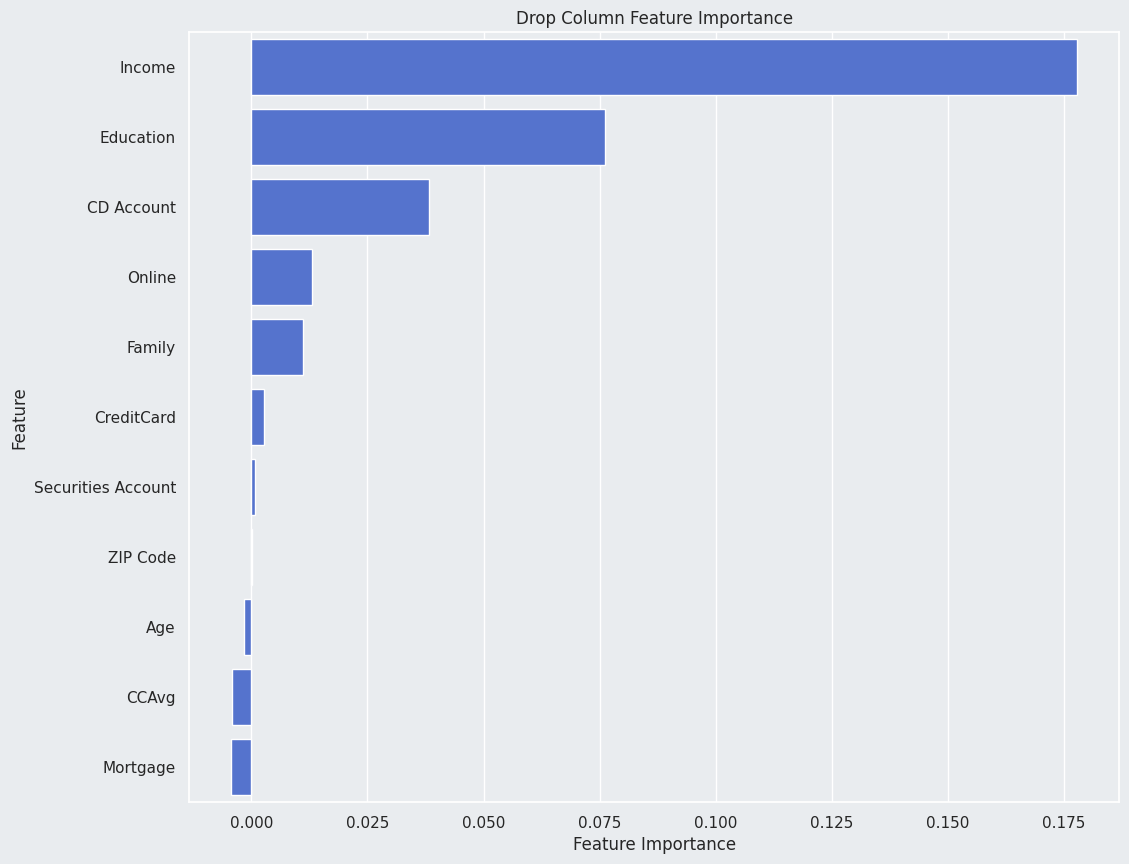

In [ ]:
drop_column_importance_plot(logreg_opt, X_train, y_train)

There are some negative value are observed, but we will continue for model evaluation because the negative value doesnt seem to be so high


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3498
           1       0.72      0.72      0.72       323

    accuracy                           0.95      3821
   macro avg       0.85      0.85      0.85      3821
weighted avg       0.95      0.95      0.95      3821


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       875
           1       0.68      0.72      0.70        81

    accuracy                           0.95       956
   macro avg       0.83      0.84      0.84       956
weighted avg       0.95      0.95      0.95       956



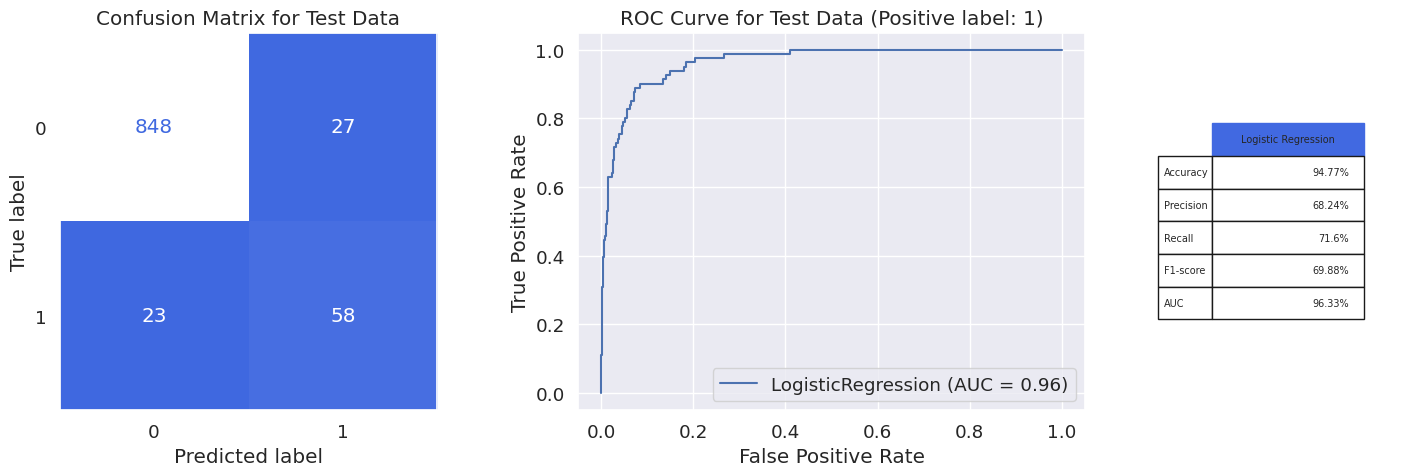

In [ ]:
model_evaluation(logreg_opt, X_train, X_test, y_train, y_test, 'Logistic Regression')

The F1-score for the positive class is quite good, and doesnt seem to be having overfitting on the model itself

Then we save the final performance of the classifier model

In [ ]:
logreg_result = metrics_calculator(logreg_opt, X_test, y_test, 'Logistic Regression')

<p style="background-color:#f0efeb;font-family:robotto;color:#003566;font-size:150%;text-align:center;border-radius:6px 6px;">KNN Model Building</p>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [ ]:
param_grid = [{'n_neighbors': np.arange(2, 30), 'metric': ['euclidean','manhattan'], 'weights': ['uniform']},
              {'n_neighbors': np.arange(2, 30), 'metric': ['minkowski'], 'p': [3,4,5], 'weights': ['uniform']}]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn_opt = tune_hyperparameters(knn, param_grid, X_train, y_train)

Best Hyperparameters:
 {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}


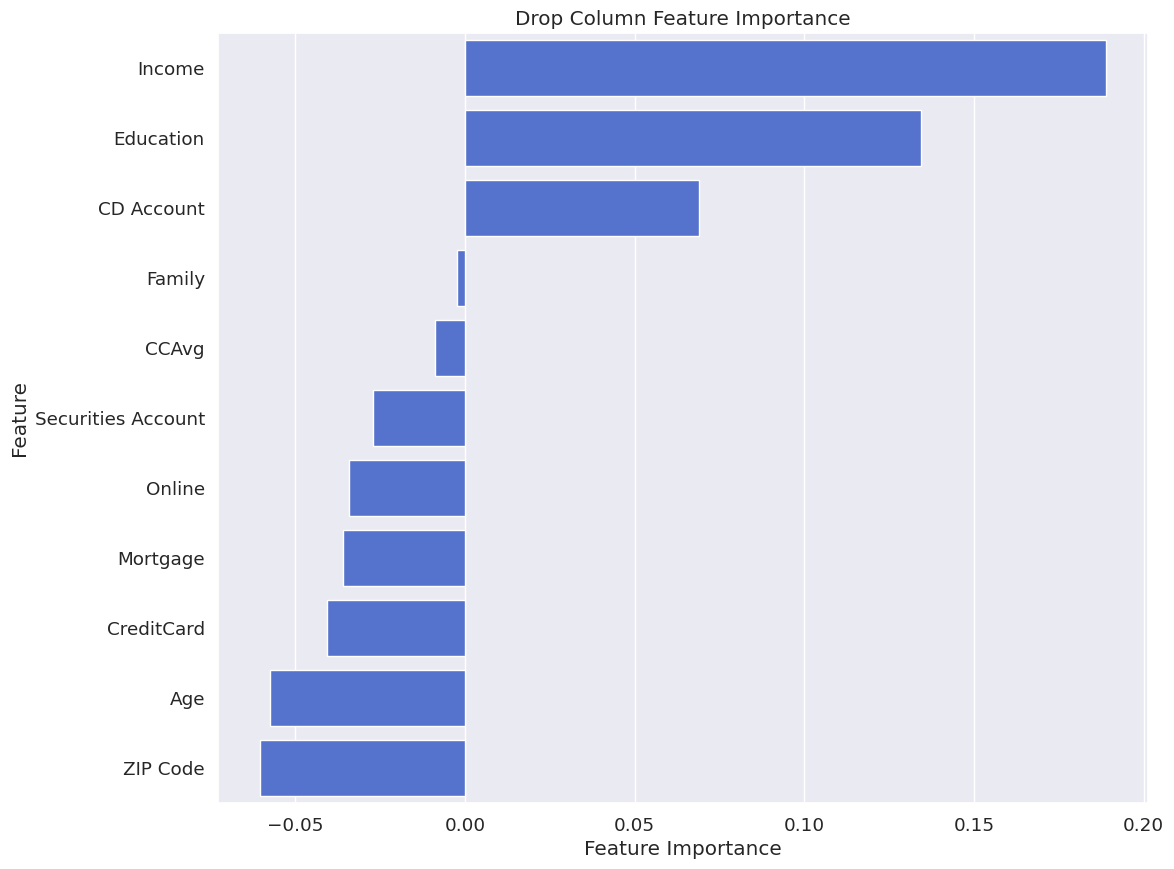

In [ ]:
drop_column_importance_plot(knn_opt, X_train, y_train)

We can see that theres a lot of negative value from the observation, removing these negative feature improves the performance of the model

Filter our dataset

In [ ]:
importances_features = drop_column_importance(knn_opt, X_train, y_train, 0)
selected_features = importances_features[importances_features['feature importance'] > 0]['feature']

X_train = X_train[selected_features]
X_test = X_test[selected_features]

**Re-tune the hyperparameters with the filtered training and test set**

In [ ]:
knn = KNeighborsClassifier()

knn_opt = tune_hyperparameters(knn, param_grid, X_train, y_train)

Best Hyperparameters:
 {'metric': 'euclidean', 'n_neighbors': 12, 'weights': 'uniform'}



	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3498
           1       0.99      0.66      0.79       323

    accuracy                           0.97      3821
   macro avg       0.98      0.83      0.89      3821
weighted avg       0.97      0.97      0.97      3821


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       875
           1       0.95      0.68      0.79        81

    accuracy                           0.97       956
   macro avg       0.96      0.84      0.89       956
weighted avg       0.97      0.97      0.97       956



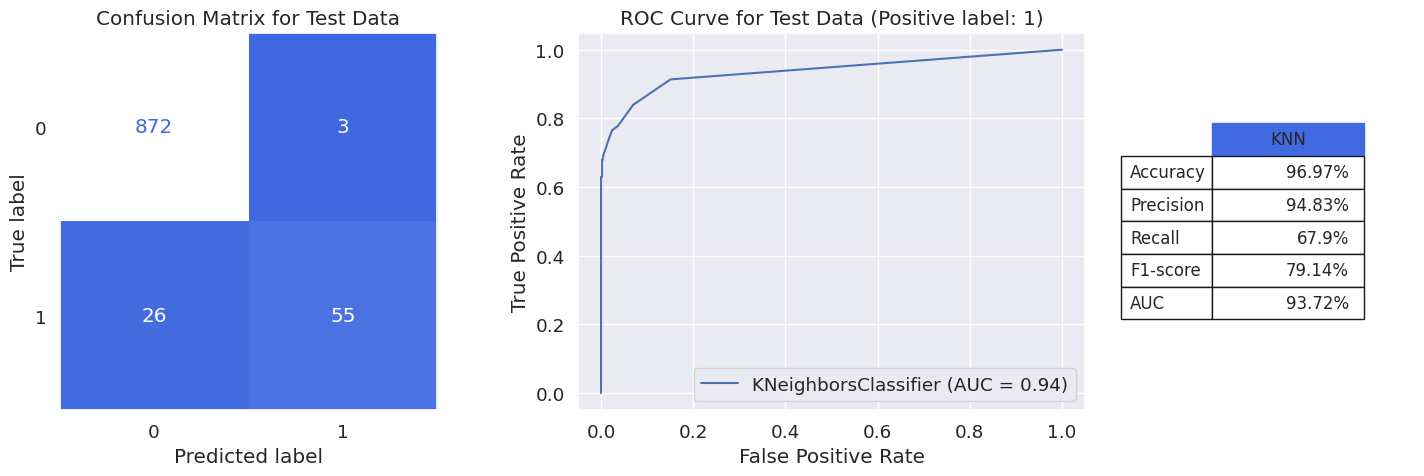

In [ ]:
model_evaluation(knn_opt, X_train, X_test, y_train, y_test, 'KNN')

the f1-score for the positive value is 79%, which have increase 9%, which is amazing! And it doesnt seems to be having overfitting at all

In [ ]:
knn_result = metrics_calculator(knn_opt, X_test, y_test, 'KNN')

<p style="background-color:#f0efeb;font-family:robotto;color:#003566;font-size:150%;text-align:center;border-radius:6px 6px;">SVM Model Building</p>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

X_train = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [ ]:
class_weights = [{0:x, 1:1.0-x} for x in np.linspace(0.001,0.5,12)]

param_grid = [{'kernel': ['rbf'],
               'gamma': [0.1, 0.01, 0.001, 0.0001],
               'C': [0.1, 1, 10, 100, 1000],
               'class_weight': class_weights}]

In [ ]:
from sklearn.svm import SVC

svm = SVC(probability = True, random_state = 0)

svm_opt = tune_hyperparameters(svm, param_grid, X_train, y_train)

Best Hyperparameters:
 {'C': 100, 'class_weight': {0: 0.4546363636363636, 1: 0.5453636363636364}, 'gamma': 0.01, 'kernel': 'rbf'}


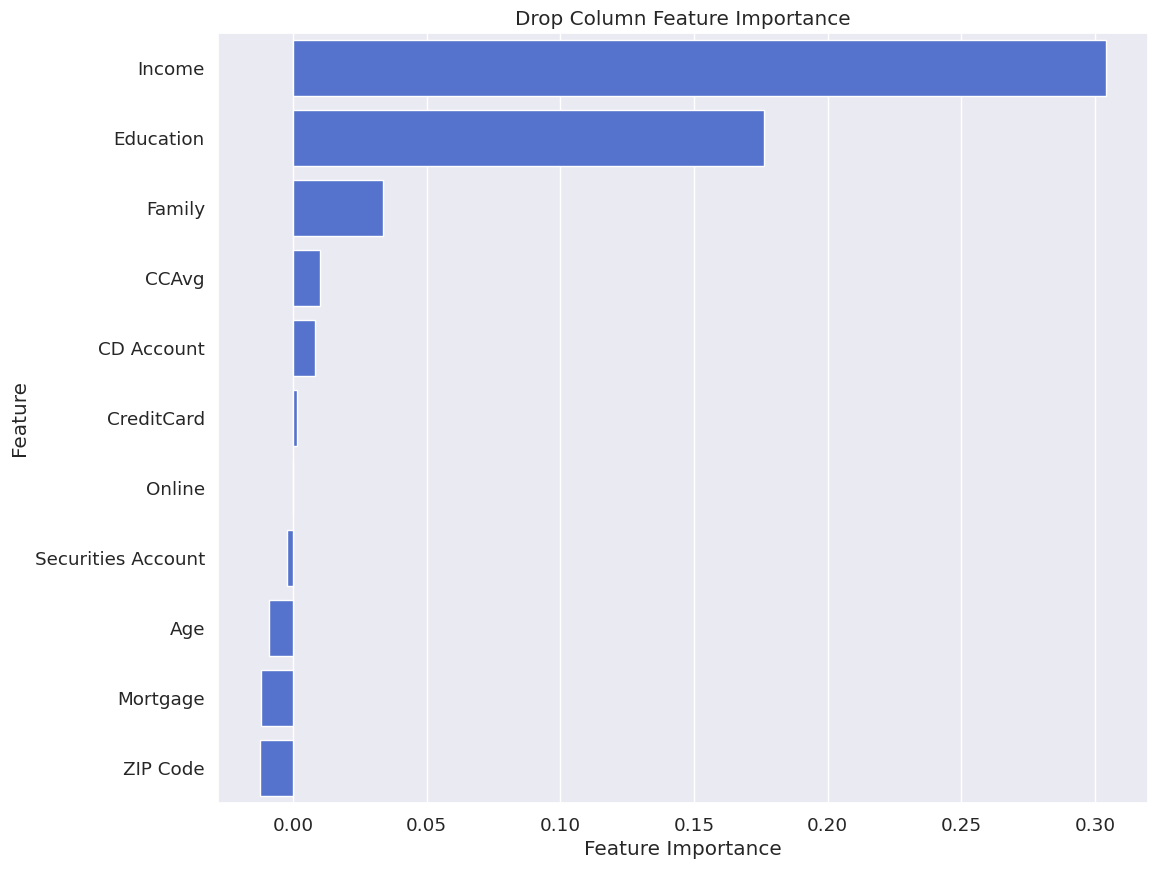

In [ ]:
e

In [ ]:
importances_feature = drop_column_importance(svm_opt, X_train, y_train, 0)
selected_features = importances_feature[importances_feature['feature importance'] > 0.01]['feature']

X_train = X_train[selected_features]
X_test = X_test[selected_features]

In [ ]:
svm = SVC(probability = True, random_state = 0)

svm_opt = tune_hyperparameters(svm, param_grid, X_train, y_train)

Best Hyperparameters:
 {'C': 100, 'class_weight': {0: 0.5, 1: 0.5}, 'gamma': 0.1, 'kernel': 'rbf'}



	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3498
           1       0.97      0.80      0.88       323

    accuracy                           0.98      3821
   macro avg       0.98      0.90      0.93      3821
weighted avg       0.98      0.98      0.98      3821


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       875
           1       0.96      0.83      0.89        81

    accuracy                           0.98       956
   macro avg       0.97      0.91      0.94       956
weighted avg       0.98      0.98      0.98       956



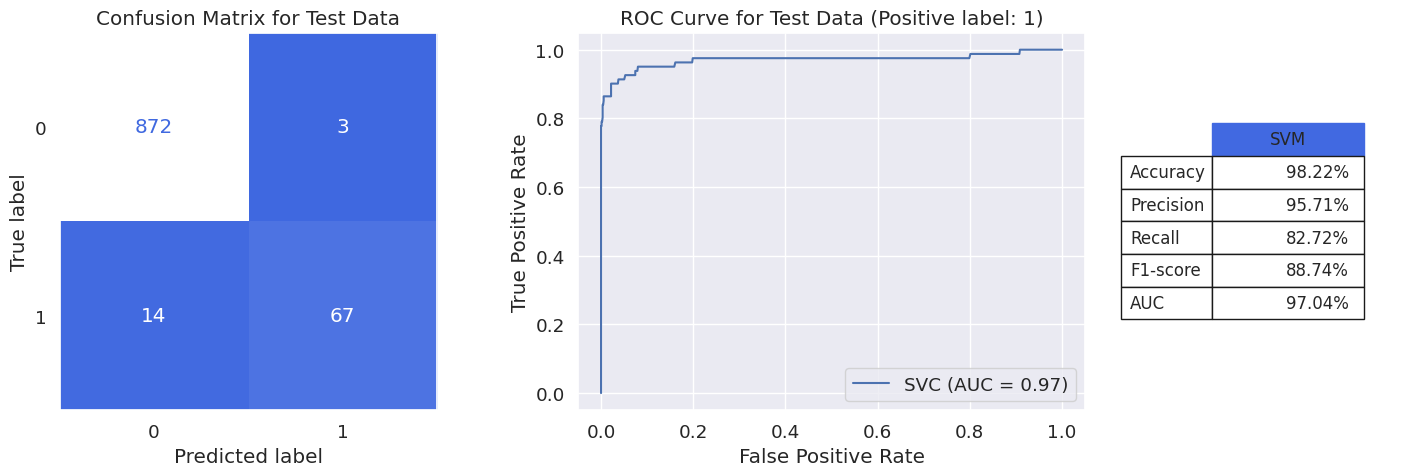

In [ ]:
model_evaluation(svm_opt, X_train, X_test, y_train, y_test, 'SVM')

Wow! The f1 score is increase 10%!!

In [ ]:
svm_result = metrics_calculator(svm_opt, X_test, y_test, 'SVM')

<p style="background-color:#f0efeb;font-family:robotto;color:#003566;font-size:150%;text-align:center;border-radius:6px 6px;">Decision Tree Model Building</p>

In [ ]:
class_weights = [{0:x, 1:1.0-x} for x in np.linspace(0.001,1,20)]

param_grid = {'criterion': ['gini'],
              'max_depth': np.arange(1, 10),
              'min_samples_split': np.arange(1, 10),
              'min_samples_leaf': np.arange(1, 10),
              # 'max_features': ['sqrt', 'log2'],
              'class_weight': class_weights}

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt_opt = tune_hyperparameters(dt, param_grid, X_train, y_train)

Best Hyperparameters:
 {'class_weight': {0: 0.36905263157894735, 1: 0.6309473684210527}, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 8}


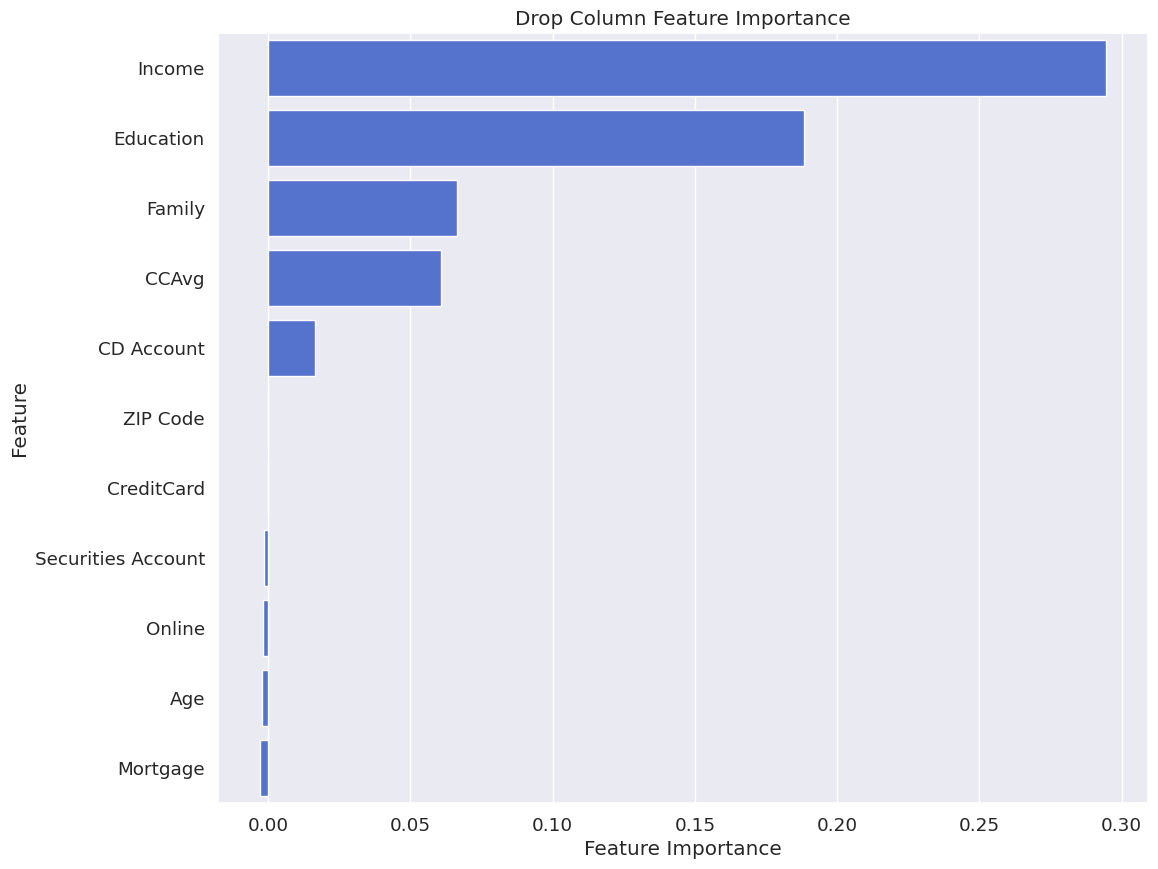

In [ ]:
drop_column_importance_plot(dt_opt, X_train, y_train)

In [ ]:
importances_feature = drop_column_importance(dt_opt, X_train, y_train, 0)
selected_features = importances_feature[importances_feature['feature importance'] > 0.01]['feature']

X_train = X_train[selected_features]
X_test = X_test[selected_features]

In [ ]:
dt = DecisionTreeClassifier()

dt_opt = tune_hyperparameters(dt, param_grid, X_train, y_train)

Best Hyperparameters:
 {'class_weight': {0: 0.36905263157894735, 1: 0.6309473684210527}, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 8}



	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3498
           1       0.95      0.92      0.94       323

    accuracy                           0.99      3821
   macro avg       0.97      0.96      0.96      3821
weighted avg       0.99      0.99      0.99      3821


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       875
           1       0.91      0.91      0.91        81

    accuracy                           0.99       956
   macro avg       0.95      0.95      0.95       956
weighted avg       0.99      0.99      0.99       956



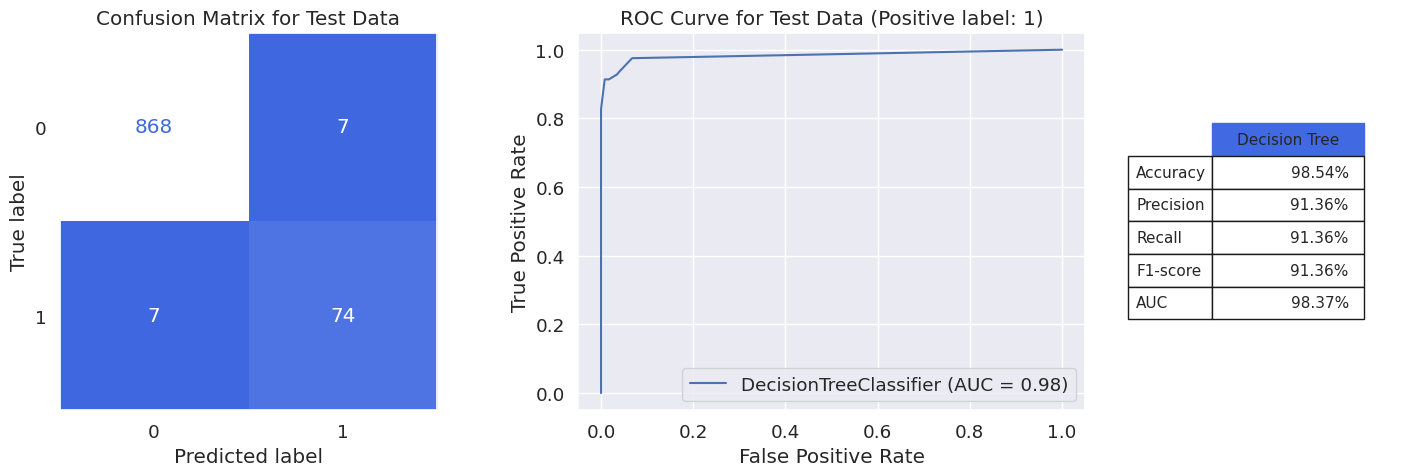

In [ ]:
model_evaluation(dt_opt, X_train, X_test, y_train, y_test, 'Decision Tree')

We keep getting a good result on the f1 score for the positive class, now it increase for 2%

In [ ]:
dt_result = metrics_calculator(dt_opt, X_test, y_test, 'Decision Tree')

<p style="background-color:#f0efeb;font-family:robotto;color:#003566;font-size:150%;text-align:center;border-radius:6px 6px;">Random Forest Model Building</p>

In [ ]:
class_weights = [{0:x, 1:1.0-x} for x in np.linspace(0.001,1,20)]

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 7, 9],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [2, 3],
    'class_weight': ['balanced', 'balanced_subsample']
}

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion = 'gini', max_features = None, bootstrap = True, random_state = 0)

rf_opt = tune_hyperparameters(rf, param_grid, X_train, y_train)

Best Hyperparameters:
 {'class_weight': 'balanced', 'max_depth': 9, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 50}


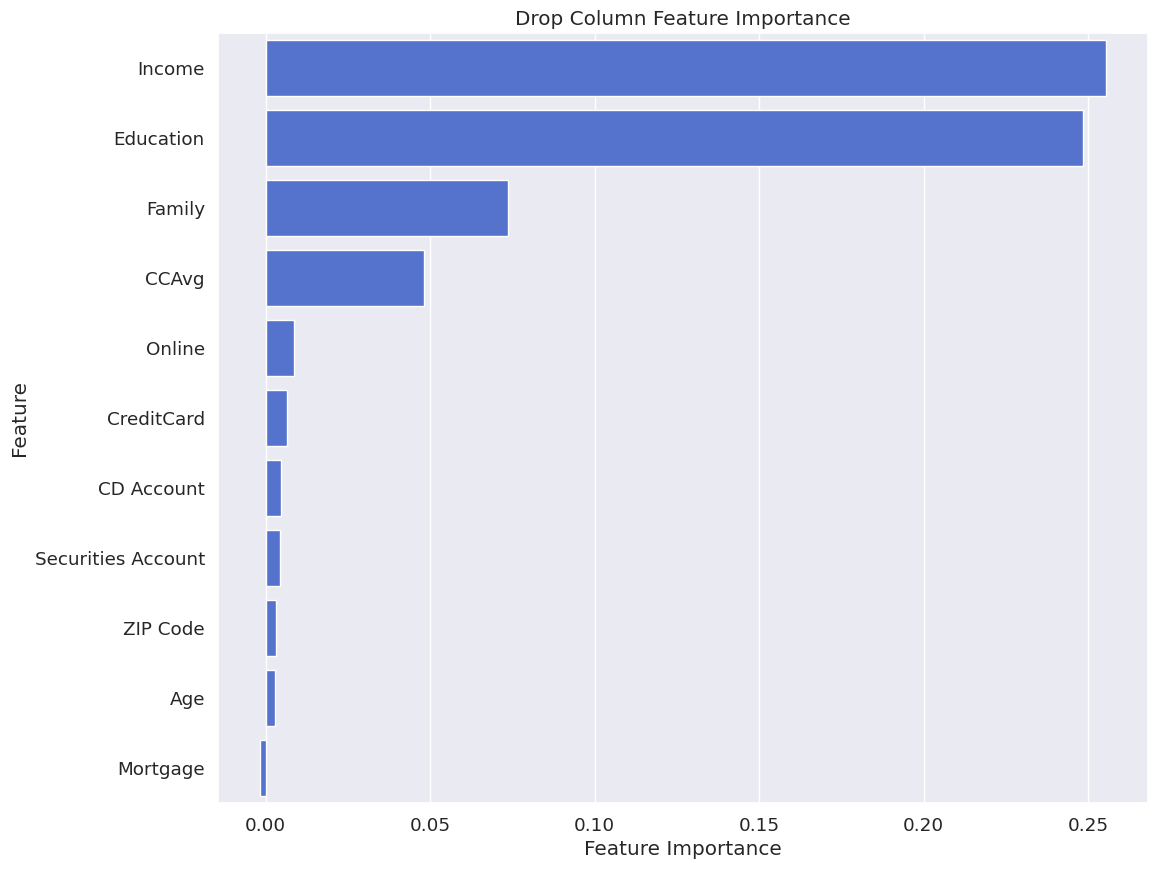

In [ ]:
drop_column_importance_plot(rf_opt, X_train, y_train)

In [ ]:
importances_feature = drop_column_importance(rf_opt, X_train, y_train, 0)
selected_features = importances_feature[importances_feature['feature importance'] > 0.01]['feature']

X_train = X_train[selected_features]
X_test = X_test[selected_features]

In [ ]:
rf = RandomForestClassifier(criterion = 'gini', max_features = None, bootstrap = True, random_state = 0)

rf_opt = tune_hyperparameters(rf, param_grid, X_train, y_train)

Best Hyperparameters:
 {'class_weight': 'balanced_subsample', 'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}



	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3498
           1       0.96      1.00      0.98       323

    accuracy                           1.00      3821
   macro avg       0.98      1.00      0.99      3821
weighted avg       1.00      1.00      1.00      3821


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       875
           1       0.94      0.89      0.91        81

    accuracy                           0.99       956
   macro avg       0.96      0.94      0.95       956
weighted avg       0.99      0.99      0.99       956



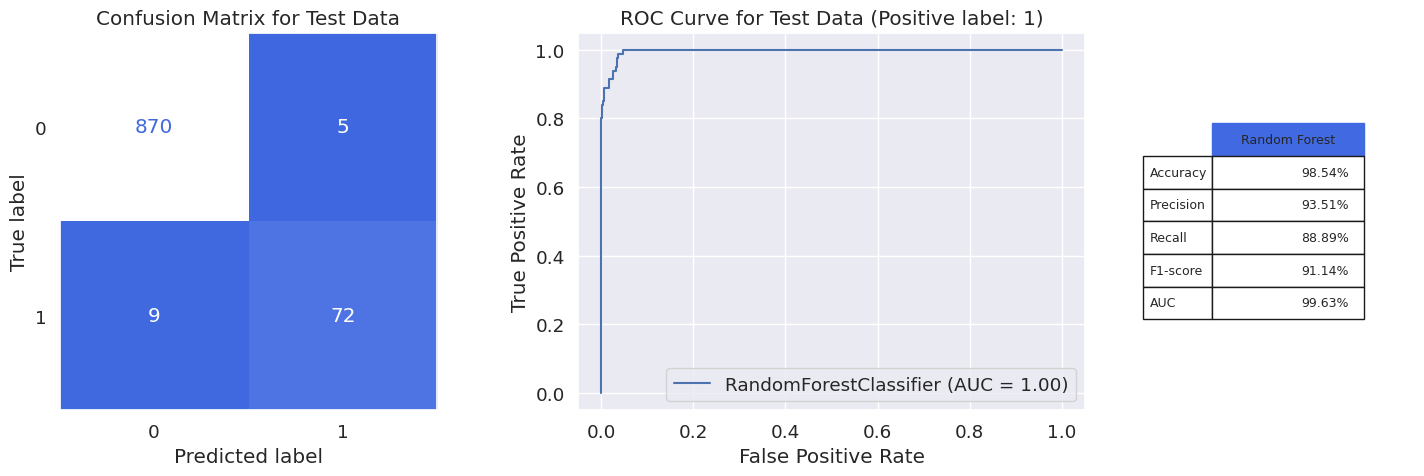

In [ ]:
model_evaluation(rf_opt, X_train, X_test, y_train, y_test, 'Random Forest')

We can see that random forest have the same f1 score as the decision tree, but there is a slight overfitting

In [ ]:
rf_result = metrics_calculator(rf_opt, X_test, y_test, 'Random Forest')

<p style="background-color:#f0efeb;font-family:robotto;color:#003566;font-size:150%;text-align:center;border-radius:6px 6px;">Gradient Boosting Model Building</p>

In [ ]:
gbc_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 6],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [3, 4],
    'subsample': [0.9, 1.0],
    'learning_rate': [0.2, 0.3]
}

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(max_features = None, loss = 'log_loss', criterion = 'friedman_mse', random_state = 0, subsample=1.0)

gbc_opt = tune_hyperparameters(gbc, gbc_param_grid, X_train, y_train)

Best Hyperparameters:
 {'learning_rate': 0.2, 'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 1.0}


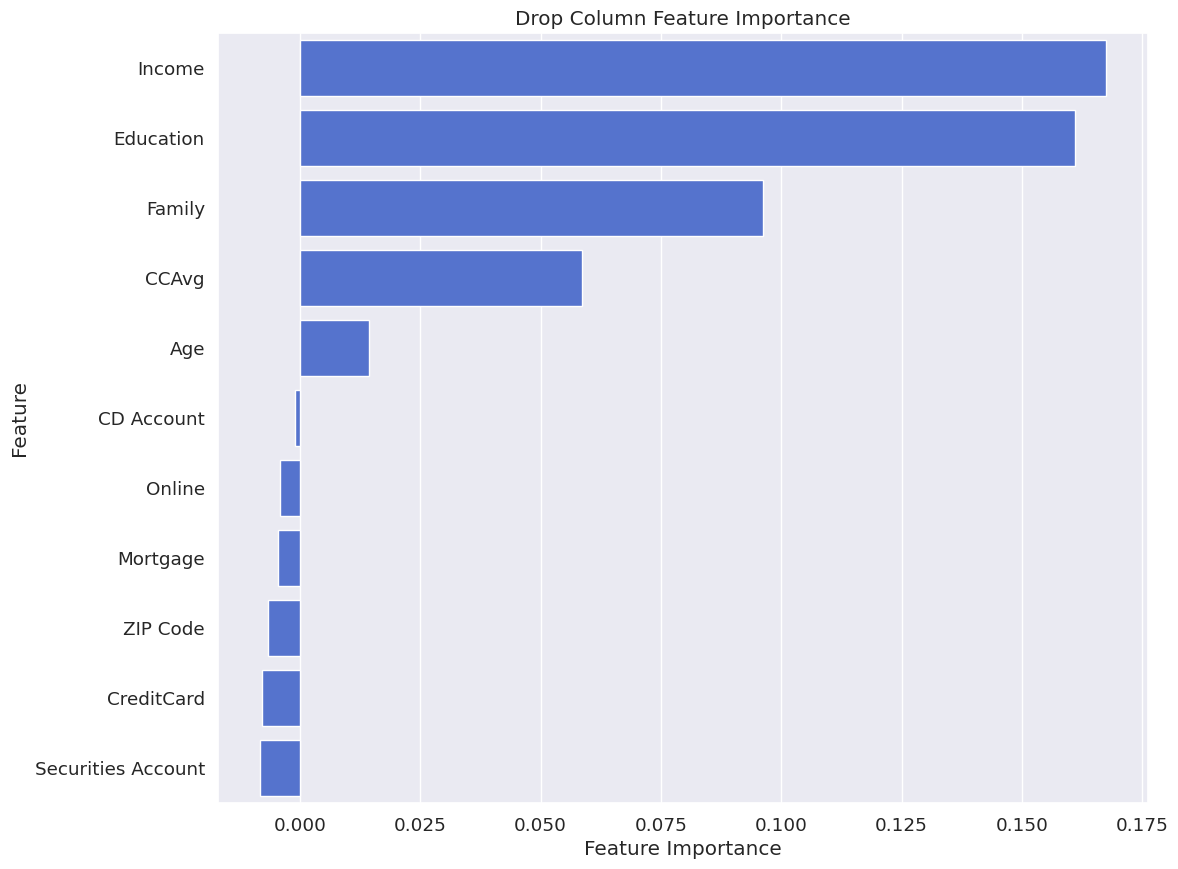

In [ ]:
drop_column_importance_plot(gbc_opt, X_train, y_train)

In [ ]:
importances_feature = drop_column_importance(gbc_opt, X_train, y_train, 0)
selected_features = importances_feature[importances_feature['feature importance'] > 0.01]['feature']

X_train = X_train[selected_features]
X_test = X_test[selected_features]

In [ ]:
gbc = GradientBoostingClassifier(max_features = None, loss = 'log_loss', criterion = 'friedman_mse', random_state = 0)

gbc_opt = tune_hyperparameters(gbc, gbc_param_grid, X_train, y_train)

Best Hyperparameters:
 {'learning_rate': 0.2, 'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 1.0}



	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3498
           1       1.00      1.00      1.00       323

    accuracy                           1.00      3821
   macro avg       1.00      1.00      1.00      3821
weighted avg       1.00      1.00      1.00      3821


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       875
           1       0.97      0.88      0.92        81

    accuracy                           0.99       956
   macro avg       0.98      0.94      0.96       956
weighted avg       0.99      0.99      0.99       956



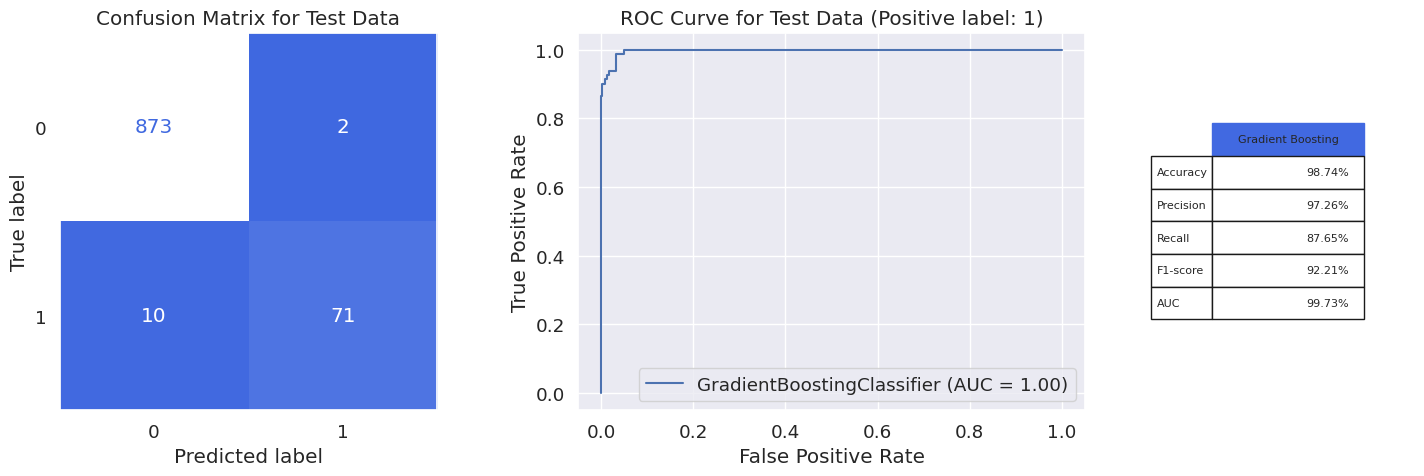

In [ ]:
model_evaluation(gbc_opt, X_train, X_test, y_train, y_test, 'Gradient Boosting')

The f1_score increase for 1 percent, nice!

In [ ]:
gbc_result = metrics_calculator(gbc_opt, X_test, y_test, 'Gradient Boosting')

<p style="background-color:#f0efeb;font-family:robotto;color:#003566;font-size:150%;text-align:center;border-radius:6px 6px;">XGBoost Classifier Model Building</p>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [ ]:
for column in ['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']:
  X_train[column] = X_train[column].astype(int)
  X_test[column] = X_test[column].astype(int)

In [ ]:
ratio = sum(y_train==0)/sum(y_train==1)

xgb_param_grid = {
    'max_depth': [5, 7],
    'learning_rate': [0.1, 0.2],
    'n_estimators': [100, 200],
    'min_child_weight': [1, 5],
    'scale_pos_weight': [ratio, ratio*1.3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8],
    'colsample_bylevel': [0.8],
    'reg_alpha': [0, 0.1],
    'reg_lambda': [0, 1],
    'max_delta_step': [0, 1],
    'gamma': [0, 0.1],
    'max_leaf_nodes': [4]
}


In [ ]:
from xgboost import XGBClassifier

# xgb_opt = XGBClassifier(max_depth=5,
#                         learning_rate=0.3,
#                         n_estimators=200,
#                         min_child_weight=1,
#                         scale_pos_weight=1.5,
#                         colsample_bytree=0.8,
#                         gamma=0.1,
#                         booster='gbtree',
#                         objective='binary:logistic',
#                         eval_metric='error',
#                         random_state=0)

xgb = XGBClassifier()

xgb_opt = tune_hyperparameters(xgb, xgb_param_grid, X_train, y_train)

Best Hyperparameters:
 {'colsample_bylevel': 0.8, 'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 5, 'max_leaf_nodes': 4, 'min_child_weight': 1, 'n_estimators': 200, 'reg_alpha': 0, 'reg_lambda': 0, 'scale_pos_weight': 10.829721362229103, 'subsample': 0.8}


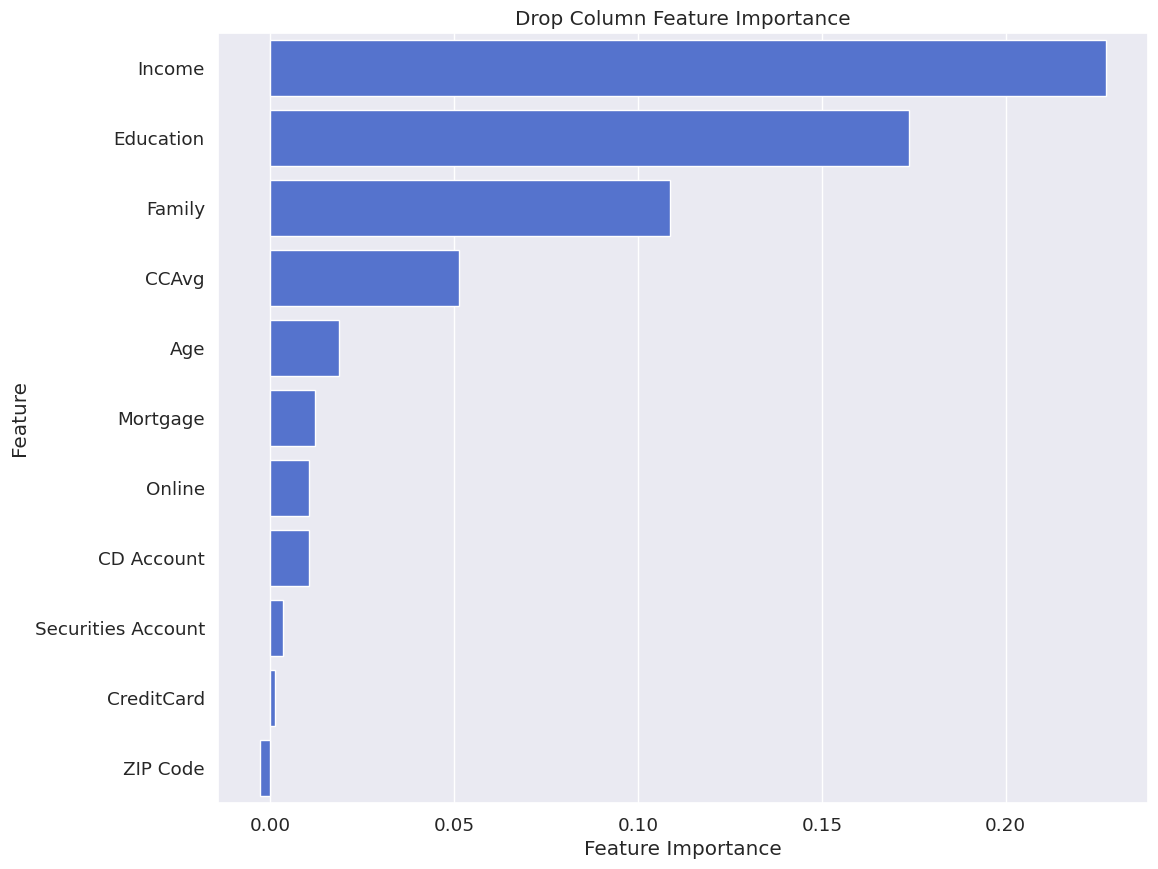

In [ ]:
drop_column_importance_plot(xgb_opt, X_train, y_train)

In [ ]:
feature_importances = drop_column_importance(xgb_opt, X_train, y_train, 0)
selected_features = feature_importances[feature_importances['feature importance']>0]['feature']

X_train = X_train[selected_features]
X_test = X_test[selected_features]

In [ ]:
xgb = XGBClassifier()

xgb_opt = tune_hyperparameters(xgb, xgb_param_grid, X_train, y_train)

Best Hyperparameters:
 {'colsample_bylevel': 0.8, 'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.1, 'max_delta_step': 1, 'max_depth': 7, 'max_leaf_nodes': 4, 'min_child_weight': 1, 'n_estimators': 200, 'reg_alpha': 0, 'reg_lambda': 0, 'scale_pos_weight': 14.078637770897835, 'subsample': 1.0}



	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3498
           1       1.00      1.00      1.00       323

    accuracy                           1.00      3821
   macro avg       1.00      1.00      1.00      3821
weighted avg       1.00      1.00      1.00      3821


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       875
           1       0.94      0.91      0.92        81

    accuracy                           0.99       956
   macro avg       0.96      0.95      0.96       956
weighted avg       0.99      0.99      0.99       956



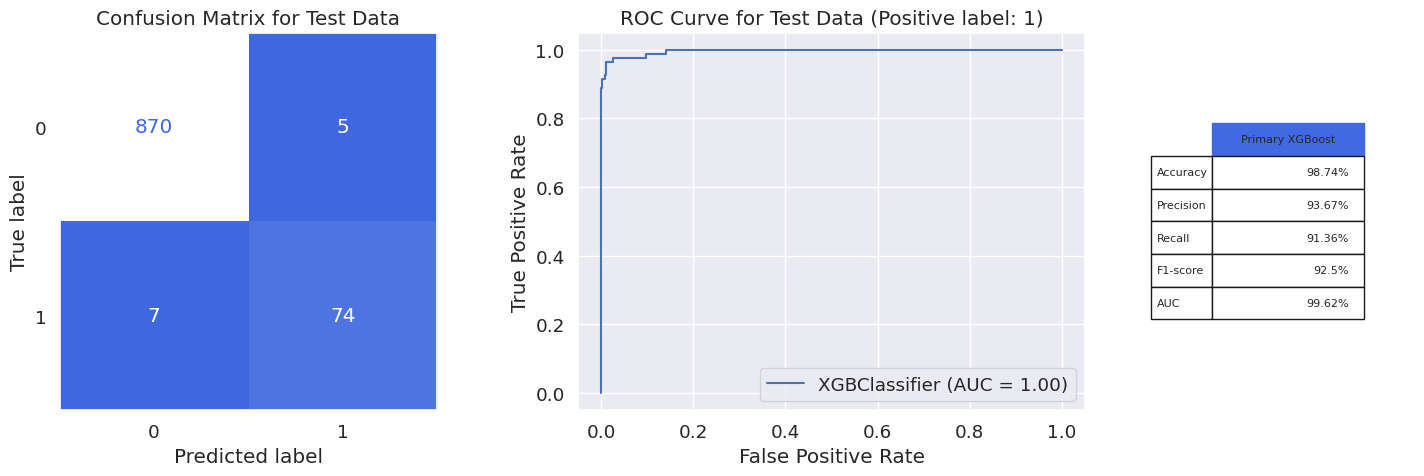

In [ ]:
model_evaluation(xgb_opt, X_train, X_test, y_train, y_test, 'Primary XGBoost')

The XGBClassifier have similiar result with the Gradient Boosting Classifier

In [ ]:
xgb_result = metrics_calculator(xgb_opt, X_test, y_test, 'XGBoost')

<p style="background-color:#f0efeb;font-family:robotto;color:#003566;font-size:150%;text-align:center;border-radius:6px 6px;">Conclusions</p>

In [ ]:
results = pd.concat([logreg_result, knn_result, svm_result, dt_result, rf_result,
                     gbc_result, xgb_result], axis = 1).T

results.sort_values(by = 'F1-score', ascending = False, inplace = True)
results.style.applymap(lambda x: 'background-color: royalblue', subset = 'F1-score')

,Accuracy,Precision,Recall,F1-score,AUC
XGBoost,98.74%,93.67%,91.36%,92.5%,99.62%
Gradient Boosting,98.74%,97.26%,87.65%,92.21%,99.73%
Decision Tree,98.54%,91.36%,91.36%,91.36%,98.37%
Random Forest,98.54%,93.51%,88.89%,91.14%,99.63%
SVM,98.22%,95.71%,82.72%,88.74%,97.04%
KNN,96.97%,94.83%,67.9%,79.14%,93.72%
Logistic Regression,94.77%,68.24%,71.6%,69.88%,96.33%


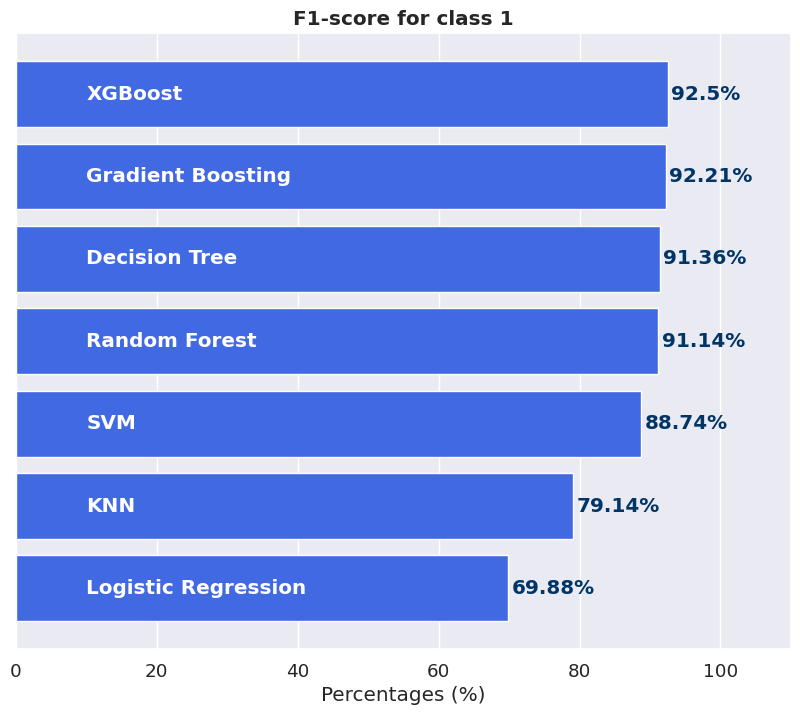

In [ ]:
results.sort_values(by = 'F1-score', ascending = True, inplace = True)
f1_scores = results['F1-score'].str.strip('%').astype(float)

fig, axes = plt.subplots(figsize = (10, 8))
axes.barh(results.index, f1_scores, color = 'royalblue')

for i, (value, name) in enumerate(zip(f1_scores, results.index)):
  axes.text(value + 0.5, i, f'{value}%', ha = 'left', va = 'center', fontweight = 'bold',
          color = palette[0])
  axes.text(10, i, name, ha = 'left', va = 'center', fontweight = 'bold', color = 'white')

axes.set_yticks([])
axes.set_xlim([0, 110])

plt.title('F1-score for class 1', fontweight = 'bold')
plt.xlabel('Percentages (%)')
plt.show()

Among all the tested classifiers, 'XGBoost Classifier' had the best performance in identifying potential loan customers